In [35]:
!pip install tensorflow
!pip install keras
!pip install scipy
!pip install pillow
!pip install classification_models
!pip install keras_applications
!pip install matplotlib
!pip install scikit-learn
!pip install opencv-python

You should consider upgrading via the 'c:\users\hanna\catsdogsvenv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hanna\catsdogsvenv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hanna\catsdogsvenv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hanna\catsdogsvenv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hanna\catsdogsvenv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hanna\catsdogsvenv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hanna\catsdogsvenv\scripts\python.exe -m pip install --upgrade pip' command.


  Using cached scikit_learn-1.0.2-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


You should consider upgrading via the 'c:\users\hanna\catsdogsvenv\scripts\python.exe -m pip install --upgrade pip' command.


  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)


You should consider upgrading via the 'c:\users\hanna\catsdogsvenv\scripts\python.exe -m pip install --upgrade pip' command.


In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from keras.utils import np_utils
import random
from shutil import copyfile
import sys
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import optimizers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image

In [13]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " has a length of zero.")

        training_length = int(len(files) * SPLIT_SIZE)
        testing_length = int(len(files) - training_length)
        shuffled_set = random.sample(files, len(files))  # shuffle the files
        training_set = shuffled_set[0:training_length]  # from index 0 to training_length
        testing_set = shuffled_set[-testing_length:]  # rest of files

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = 'C:/Users/hanna/Datasets/PetImages/Cat/'
TRAINING_CATS_DIR = 'C:/Users/hanna/Datasets/PetImages/cvd/Training/Cats/'
TESTING_CATS_DIR = 'C:/Users/hanna/Datasets/PetImages/cvd/Testing/Cats/'
DOG_SOURCE_DIR = 'C:/Users/hanna/Datasets/PetImages/Dog/'
TRAINING_DOGS_DIR = 'C:/Users/hanna/Datasets/PetImages/cvd/Training/Dogs/'
TESTING_DOGS_DIR = 'C:/Users/hanna/Datasets/PetImages/cvd/Testing/Dogs/'

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

print(len(os.listdir('C:/Users/hanna/Datasets/PetImages/cvd/Training/Cats')))
print(len(os.listdir('C:/Users/hanna/Datasets/PetImages/cvd/Training/Dogs')))
print(len(os.listdir('C:/Users/hanna/Datasets/PetImages/cvd/Testing/Cats')))
print(len(os.listdir('C:/Users/hanna/Datasets/PetImages/cvd/Testing/Dogs')))

11250
11250
1250
1250


In [15]:
TRAINING_DIR = 'C:/Users/hanna/Datasets/PetImages/cvd/Training/'
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    target_size=(224, 224),
                                                    batch_size=256,
                                                    class_mode='binary')

VALIDATION_DIR = 'C:/Users/hanna/Datasets/PetImages/cvd/Testing/'
validation_datagen = ImageDataGenerator()
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(224, 224),
                                                              batch_size=256,
                                                              class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [16]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [17]:
image_size = [224, 224]
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=image_size +[3],
                                                   include_top=False,
                                                   weights='imagenet')

In [18]:
mobilenet_model.trainable = False

In [19]:
mobilenet_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [20]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = mobilenet_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [21]:
model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=['acc'])

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

In [23]:
check_point = keras.callbacks.ModelCheckpoint(filepath="dogcat_checkpoint.h5",
                                              monitor="val_acc",
                                              mode="max",
                                              save_best_only=True,
                                              )

In [24]:
history = model.fit(train_generator,
                   validation_data = validation_generator,
                   epochs=50,
                   steps_per_epoch=88,
                   validation_steps=6,
                   callbacks=[check_point])
model.save('dogcat_mobilenet.h5')

Epoch 1/50
88/88 [==============================] - 125s 1s/step - loss: 0.5218 - acc: 0.7608 - val_loss: 0.3290 - val_acc: 0.9310
Epoch 2/50
88/88 [==============================] - 40s 456ms/step - loss: 0.3317 - acc: 0.8867 - val_loss: 0.2058 - val_acc: 0.9635
Epoch 3/50
88/88 [==============================] - 37s 423ms/step - loss: 0.2480 - acc: 0.9188 - val_loss: 0.1558 - val_acc: 0.9714
Epoch 4/50
88/88 [==============================] - 37s 423ms/step - loss: 0.2094 - acc: 0.9297 - val_loss: 0.1314 - val_acc: 0.9714
Epoch 5/50
88/88 [==============================] - 38s 426ms/step - loss: 0.1866 - acc: 0.9362 - val_loss: 0.1096 - val_acc: 0.9779
Epoch 6/50
88/88 [==============================] - 38s 424ms/step - loss: 0.1698 - acc: 0.9404 - val_loss: 0.0850 - val_acc: 0.9844
Epoch 7/50
88/88 [==============================] - 37s 423ms/step - loss: 0.1569 - acc: 0.9452 - val_loss: 0.0950 - val_acc: 0.9798
Epoch 8/50
88/88 [==============================] - 38s 430ms/step - lo

-----------------------Tuning Model----------------------------------

In [25]:
mobilenet_model.trainable = True

In [26]:
print("Number of layers: ", len(mobilenet_model.layers))
tune_from = 100
for layer in mobilenet_model.layers[:tune_from]:
  layer.trainable = False

Number of layers:  154


In [27]:
model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.RMSprop(learning_rate=0.00001),
                  metrics=['acc'])

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

In [30]:
history_tune = model.fit(train_generator,
                         epochs=75,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_generator,
                         steps_per_epoch=88,
                         validation_steps=6,
                         callbacks=[check_point])

Epoch 50/75
88/88 [==============================] - 48s 540ms/step - loss: 0.0878 - acc: 0.9669 - val_loss: 0.0480 - val_acc: 0.9824
Epoch 51/75
88/88 [==============================] - 48s 545ms/step - loss: 0.0717 - acc: 0.9719 - val_loss: 0.0388 - val_acc: 0.9883
Epoch 52/75
88/88 [==============================] - 52s 582ms/step - loss: 0.0675 - acc: 0.9736 - val_loss: 0.0396 - val_acc: 0.9837
Epoch 53/75
88/88 [==============================] - 66s 752ms/step - loss: 0.0654 - acc: 0.9737 - val_loss: 0.0255 - val_acc: 0.9902
Epoch 54/75
88/88 [==============================] - 59s 661ms/step - loss: 0.0609 - acc: 0.9760 - val_loss: 0.0246 - val_acc: 0.9915
Epoch 55/75
88/88 [==============================] - 52s 588ms/step - loss: 0.0582 - acc: 0.9763 - val_loss: 0.0373 - val_acc: 0.9889
Epoch 56/75
88/88 [==============================] - 67s 764ms/step - loss: 0.0520 - acc: 0.9804 - val_loss: 0.0527 - val_acc: 0.9798
Epoch 57/75
88/88 [==============================] - 51s 578ms

------------EVALUATE MISCLASSIFIED IMAGES----------------

In [118]:
from keras.models import load_model
model = load_model('dogcat_checkpoint.h5')

In [95]:
misclassified_cats = []
for img in os.listdir(TESTING_CATS_DIR):
    img_path = os.path.join(TESTING_CATS_DIR, img)
    img_array = cv2.imread(img_path, 1)
    new_array = cv2.resize(img_array, (224, 224))
    final_img = new_array.reshape(-1, 224, 224, 3)
    prediction = model.predict([final_img])
    if prediction > 0.5:
        misclassified_cats.append((img_path, prediction))

In [119]:
print(len(misclassified_cats))

19


19


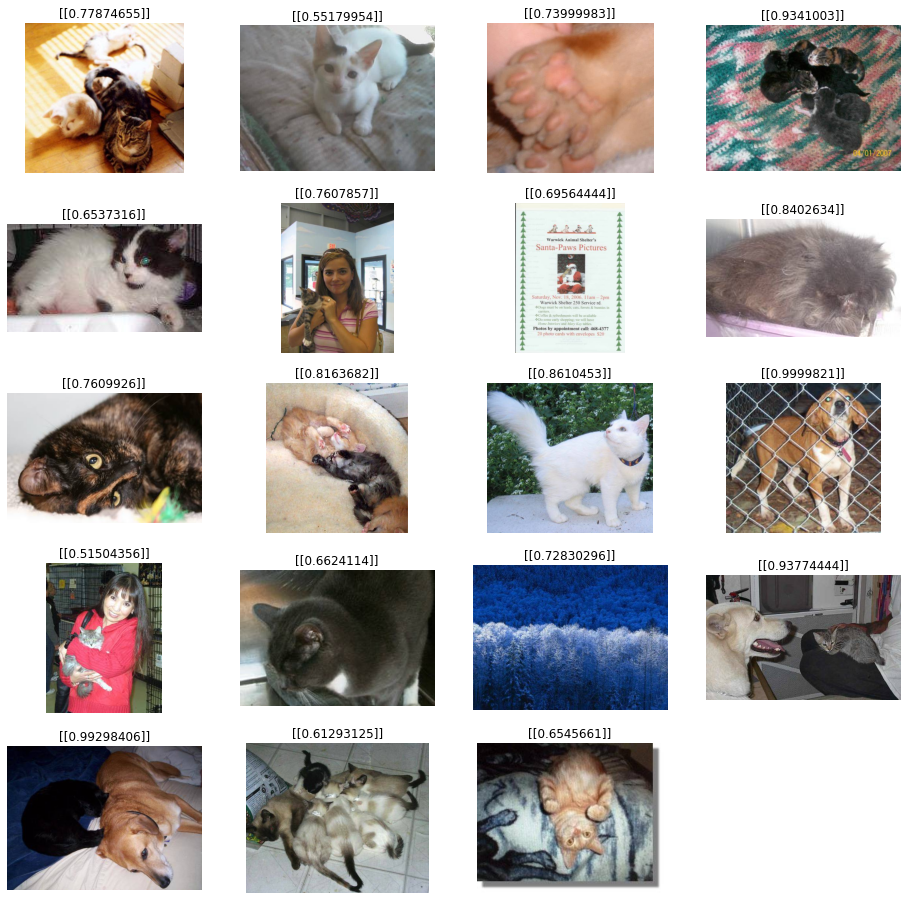

In [117]:
i = 0
fig = plt.figure(figsize=(16,16))
for img, x, in misclassified_cats:
    i+=1
    plt.subplot(5, 4, i)
    plt.title(str(x))
    plt.axis('off')
    image = plt.imread(img)
    plt.imshow(image)

In [121]:
misclassified_dogs = []
for img in os.listdir(TESTING_DOGS_DIR):
    img_path = os.path.join(TESTING_DOGS_DIR, img)
    img_array = cv2.imread(img_path, 1)
    new_array = cv2.resize(img_array, (224, 224))
    final_img = new_array.reshape(-1, 224, 224, 3)
    prediction = model.predict([final_img])
    if prediction <= 0.5:
        misclassified_dogs.append((img_path, prediction))

In [122]:
print(len(misclassified_dogs))

14


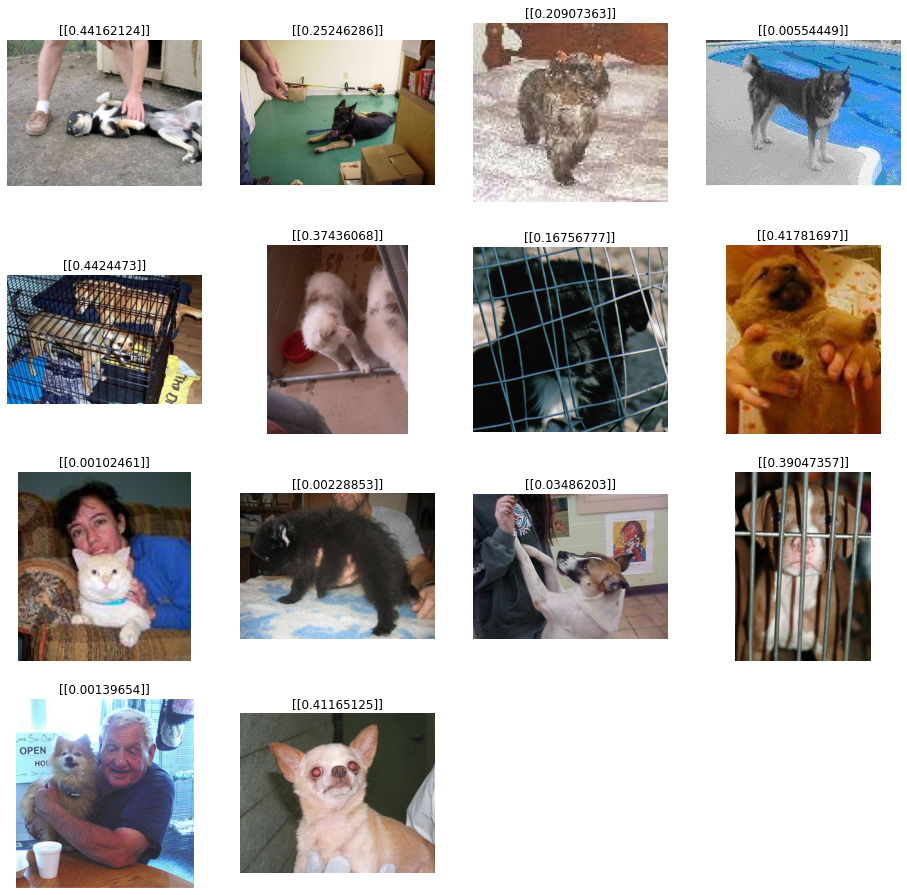

In [123]:
i = 0
fig = plt.figure(figsize=(16,16))
for img, x, in misclassified_dogs:
    i+=1
    plt.subplot(4, 4, i)
    plt.title(str(x))
    plt.axis('off')
    image = plt.imread(img)
    plt.imshow(image)

It is found that there are mislabeled images as well as images that do not include a cat or a dog in the dataset